# <b># PA 2: Classification - Decision Tree</b>

## Student Details 

Student Name and ID: **Kundana Vaka** - **1001827398**


## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName' [1 point]

Do not upload the database file [-50 points]

## Programming Assignment Details (7 Points)

For this assignment use Jupyter notebook, Panda, and scikit.

1) Load adult dataset from train_cl.csv [1 points]

2) Create a dataframe and print the first and last five records of your dataset. [2 points]

3) Print the class labels. [2 points]

4) Split your dataset 70% for training, and 30% for testing the classifier. [2 points]

## DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split. [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score,
and support). [2 points]

4) Print the decision tree visualization. [5 points]

## Naive Bayes (10 Points)
1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point]

2) Use comments to explain your code and variable names[1 point]

3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score,
and support). [4 points]

## Report (20 Points)
1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it
on your own. [4 points]

2) Describe the datasets [3 points] and if you have done any pre-processing , and your code. [2 points]

4) Visualization of the decision tree for gini and entropy.[5 points]

5) Interpret your results, and do not forget to compare gini and entropy [6 points]

Do not to forget to cite your sources!

## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - 

In [114]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
# To split dataset for training and testing
from sklearn.model_selection import train_test_split
# To import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#Import accuracy_score, confusion_matrix , classification_report from scikit-learn metrics module
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
# For Naive bayes
from sklearn.naive_bayes import GaussianNB

In [115]:
# 1) Load adult dataset from train_cl.csv [1 points]
#read the csv file into a Pandas data frame
df_data = pd.read_csv('train_cl.csv', encoding='latin1')

# 2) Create a dataframe and print the first and last five records of your dataset. [2 points]
#return the first 5 rows of the dataset
df_data.head()

,Unnamed: 0,Survived,Sex,Age,Fare,famiy,Embarked_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,isAlone
0,0,0,0,22.0,7.2500,2,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,1,1,38.0,71.2833,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2,1,1,26.0,7.9250,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,3,1,1,35.0,53.1000,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,4,0,0,35.0,8.0500,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [138]:
# Retrieved from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html

#return the last 5 rows of the dataset
df_data.tail()

,Unnamed: 0,Survived,Sex,Age,Fare,famiy,Embarked_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,isAlone
886,886,0,0,27.000000,13.00,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
887,887,1,1,19.000000,30.00,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
888,888,0,1,29.699118,23.45,4,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
889,889,1,0,26.000000,30.00,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
890,890,0,0,32.000000,7.75,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [117]:
# 3) Print the class labels. [2 points]
df_data['Survived'].unique().tolist()

[0, 1]

In [118]:
# Retrieved from https://www.w3resource.com/pandas/dataframe/dataframe-drop.php
# Retrieved from https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d

# 4) Split your dataset 70% for training, and 30% for testing the classifier. [2 points]
X = df_data.drop(['Unnamed: 0', 'Survived'], axis=1)
y = df_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

The Accuracy is: 0.7686567164179104
Confusion Matrix: 
 [[162   4]
 [ 58  44]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.98      0.84       166
           1       0.92      0.43      0.59       102

    accuracy                           0.77       268
   macro avg       0.83      0.70      0.71       268
weighted avg       0.80      0.77      0.74       268



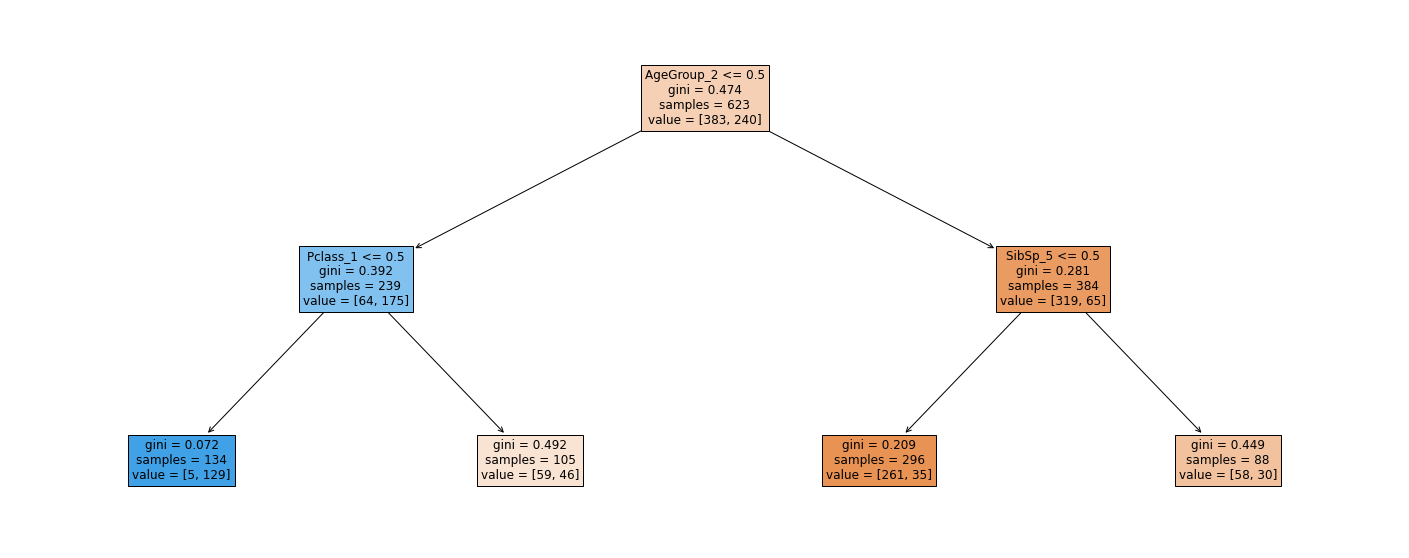

In [119]:
# DecisionTree (10 Points)

# Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Gini
# Instantiate: create Decision Tree classifer object for Gini impurity
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=2,min_samples_leaf=5)
# Train the model
clf = clf.fit(X_train,y_train)
# Predict the response
y_predict = clf.predict(X_test)

# Evaluate the model performance using test set
# Model accuracy
print("The Accuracy is:", accuracy_score(y_test,y_predict))
# Confusion Matrix :
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predict))
# Classification report
print("Classification Report: \n",classification_report(y_test,y_predict))

# Print the decision tree visualization
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(clf, fontsize=12, feature_names = df_data.columns, filled=True)
plt.show()

The Accuracy is: 0.7686567164179104
Confusion Matrix: 
 [[162   4]
 [ 58  44]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.98      0.84       166
           1       0.92      0.43      0.59       102

    accuracy                           0.77       268
   macro avg       0.83      0.70      0.71       268
weighted avg       0.80      0.77      0.74       268



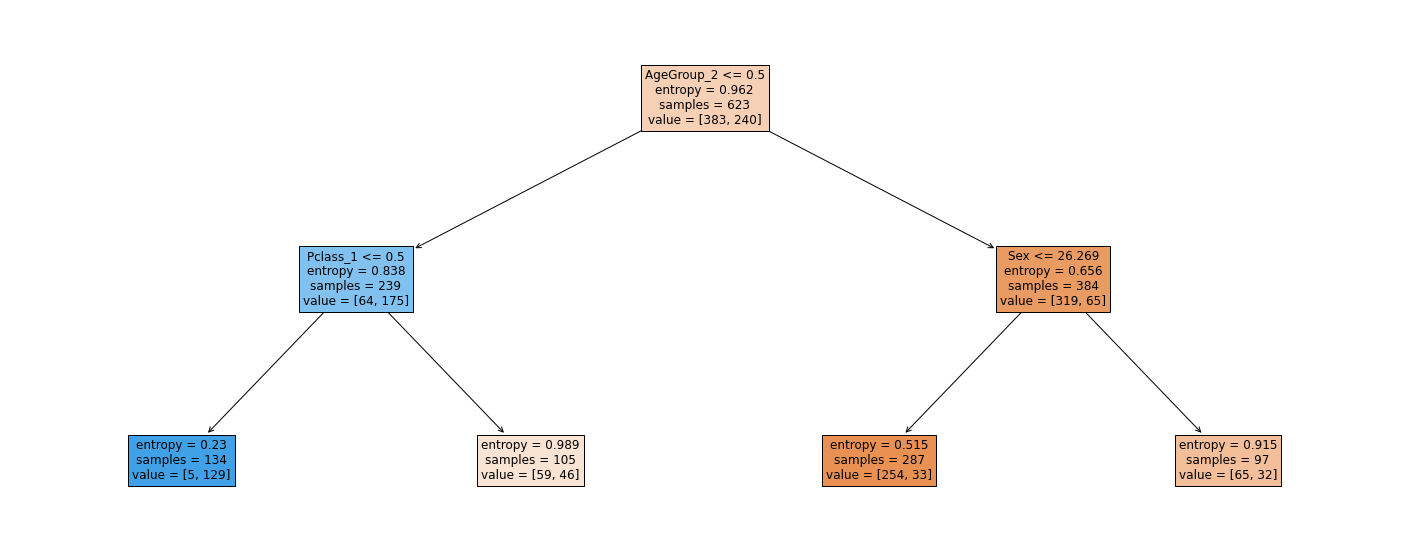

In [122]:
# Entropy
# Instantiate: create Decision Tree classifer object for entropy
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=2,min_samples_leaf=5)
# Train the model
clf = clf.fit(X_train,y_train)
# Predict the response
y_predict = clf.predict(X_test)

# Evaluate the model performance using test set
# Model accuracy
print("The Accuracy is:", accuracy_score(y_test,y_predict))
# Confusion Matrix :
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predict))
# Classification report
print("Classification Report: \n",classification_report(y_test,y_predict))

# Print the decision tree visualization
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(clf, fontsize=12, feature_names = df_data.columns, filled=True)
plt.show()

In [126]:
# Naive Bayes (10 Points)

# Retrieved from https://towardsdatascience.com/how-to-impliment-a-gaussian-naive-bayes-classifier-in-python-from-scratch-11e0b80faf5a

# Instantiate: create Gaussian Classifier object
gnb = GaussianNB()
#Train the model
gnb.fit(X_train, y_train)
#Predict the response
y_pred = gnb.predict(X_test)

# Evaluate the model performance using test set
# Model accuracy
print("The Accuracy is:", accuracy_score(y_test,y_predict))
# Confusion Matrix :
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predict))
# Classification report
print("Classification Report: \n",classification_report(y_test,y_predict))

The Accuracy is: 0.4291044776119403
Confusion Matrix: 
 [[162   4]
 [ 58  44]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.98      0.84       166
           1       0.92      0.43      0.59       102

    accuracy                           0.77       268
   macro avg       0.83      0.70      0.71       268
weighted avg       0.80      0.77      0.74       268

